In [1]:
#Load Libraries-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

Using TensorFlow backend.


In [2]:
#setting working directory
os.chdir("C:/Users/Vikas Mehra/Downloads/SmartMeter")

In [3]:
#Load data-
#data= pd.read_excel("realtime2.xls", sheetname=None)

xls = pd.ExcelFile('realtime2.xls')
df1 = pd.read_excel(xls, 'Sheet1')
df2 = pd.read_excel(xls, 'Sheet2')
df3 = pd.read_excel(xls, 'Sheet3')
df4 = pd.read_excel(xls, 'Sheet4')
df5 = pd.read_excel(xls, 'Sheet5')
df6 = pd.read_excel(xls, 'Sheet6')
df7 = pd.read_excel(xls, 'Sheet7')
df8 = pd.read_excel(xls, 'Sheet8')
df9 = pd.read_excel(xls, 'Sheet9')


In [4]:
#data = pd.concat( data[frame] for frame in data.keys())

In [5]:
df1[' Captured Date and Time'] = pd.to_datetime(df1[' Captured Date and Time'])
df2[' Captured Date and Time'] = pd.to_datetime(df2[' Captured Date and Time'])
df3[' Captured Date and Time'] = pd.to_datetime(df3[' Captured Date and Time'])
df4[' Captured Date and Time'] = pd.to_datetime(df4[' Captured Date and Time'])
df5[' Captured Date and Time'] = pd.to_datetime(df5[' Captured Date and Time'])
df6[' Captured Date and Time'] = pd.to_datetime(df6[' Captured Date and Time'])
df7[' Captured Date and Time'] = pd.to_datetime(df7[' Captured Date and Time'])
df8[' Captured Date and Time'] = pd.to_datetime(df8[' Captured Date and Time'])
df9[' Captured Date and Time'] = pd.to_datetime(df9[' Captured Date and Time'])

In [6]:
df1.set_index(' Captured Date and Time', inplace= True)
df2.set_index(' Captured Date and Time', inplace= True)
df3.set_index(' Captured Date and Time', inplace= True)
df4.set_index(' Captured Date and Time', inplace= True)
df5.set_index(' Captured Date and Time', inplace= True)
df6.set_index(' Captured Date and Time', inplace= True)
df7.set_index(' Captured Date and Time', inplace= True)
df8.set_index(' Captured Date and Time', inplace= True)
df9.set_index(' Captured Date and Time', inplace= True)

In [7]:
df1 = df1.groupby(pd.TimeGrouper(freq='30Min')).aggregate(np.sum)
df2 = df2.groupby(pd.TimeGrouper(freq='30Min')).aggregate(np.sum)
df3 = df3.groupby(pd.TimeGrouper(freq='30Min')).aggregate(np.sum)
df4 = df4.groupby(pd.TimeGrouper(freq='30Min')).aggregate(np.sum)
df5 = df5.groupby(pd.TimeGrouper(freq='30Min')).aggregate(np.sum)
df6 = df6.groupby(pd.TimeGrouper(freq='30Min')).aggregate(np.sum)
df7 = df7.groupby(pd.TimeGrouper(freq='30Min')).aggregate(np.sum)
df8 = df8.groupby(pd.TimeGrouper(freq='30Min')).aggregate(np.sum)
df9 = df9.groupby(pd.TimeGrouper(freq='30Min')).aggregate(np.sum)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


In [8]:
df1.index

DatetimeIndex(['2019-05-01 00:00:00', '2019-05-01 00:30:00',
               '2019-05-01 01:00:00', '2019-05-01 01:30:00',
               '2019-05-01 02:00:00', '2019-05-01 02:30:00',
               '2019-05-01 03:00:00', '2019-05-01 03:30:00',
               '2019-05-01 04:00:00', '2019-05-01 04:30:00',
               ...
               '2019-05-10 19:00:00', '2019-05-10 19:30:00',
               '2019-05-10 20:00:00', '2019-05-10 20:30:00',
               '2019-05-10 21:00:00', '2019-05-10 21:30:00',
               '2019-05-10 22:00:00', '2019-05-10 22:30:00',
               '2019-05-10 23:00:00', '2019-05-10 23:30:00'],
              dtype='datetime64[ns]', name=' Captured Date and Time', length=480, freq='30T')

In [9]:
weather= pd.read_excel("weather.xlsx")
weather[' Captured Date and Time'] = df1.index

In [10]:
weather


,Captured Date and Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Precip Accum,Condition
0,2019-05-01 00:00:00,93 F,50 F,23 %,SE,5 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
1,2019-05-01 00:30:00,91 F,50 F,24 %,CALM,0 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
2,2019-05-01 01:00:00,90 F,52 F,27 %,CALM,0 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
3,2019-05-01 01:30:00,90 F,52 F,27 %,N,7 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
4,2019-05-01 02:00:00,88 F,54 F,31 %,NE,7 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
5,2019-05-01 02:30:00,88 F,54 F,31 %,ENE,5 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
6,2019-05-01 03:00:00,86 F,54 F,33 %,ENE,5 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
7,2019-05-01 03:30:00,86 F,54 F,33 %,ENE,6 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
8,2019-05-01 04:00:00,84 F,54 F,35 %,E,3 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
9,2019-05-01 04:30:00,84 F,55 F,37 %,E,3 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze


In [11]:
df1 = pd.merge(df1, weather, how='outer', on = ' Captured Date and Time')
df2 = pd.merge(df2, weather, how='outer', on = ' Captured Date and Time')
df3 = pd.merge(df3, weather, how='outer', on = ' Captured Date and Time')
df4 = pd.merge(df4, weather, how='outer', on = ' Captured Date and Time')
df5 = pd.merge(df5, weather, how='outer', on = ' Captured Date and Time')
df6 = pd.merge(df6, weather, how='outer', on = ' Captured Date and Time')
df7 = pd.merge(df7, weather, how='outer', on = ' Captured Date and Time')
df8 = pd.merge(df8, weather, how='outer', on = ' Captured Date and Time')
df9 = pd.merge(df9, weather, how='outer', on = ' Captured Date and Time')

In [12]:
df1['ID']=df1['ID']/2
df2['ID']=df2['ID']/2
df3['ID']=df3['ID']/2
df4['ID']=df4['ID']/2
df5['ID']=df5['ID']/2
df6['ID']=df6['ID']/2
df7['ID']=df7['ID']/2
df8['ID']=df8['ID']/2
df9['ID']=df9['ID']/2

df1['Average Voltage(V)']=df1['Average Voltage(V)']/2
df1['Average Current(A)']=df1['Average Current(A)']/2

In [13]:
df1.dtypes

 Captured Date and Time    datetime64[ns]
ID                                float64
Active Energy(kWh)                float64
Apparent Energy(kVAh)             float64
Average Voltage(V)                float64
Average Current(A)                float64
Temperature                        object
Dew Point                          object
Humidity                           object
Wind                               object
Wind Speed                         object
Wind Gust                          object
Pressure                           object
Precip.                            object
Precip Accum                       object
Condition                          object
dtype: object

In [14]:
df1

,Captured Date and Time,ID,Active Energy(kWh),Apparent Energy(kVAh),Average Voltage(V),Average Current(A),Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Precip Accum,Condition
0,2019-05-01 00:00:00,1.0,0.099,0.120,226.920,1.050,93 F,50 F,23 %,SE,5 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
1,2019-05-01 00:30:00,1.0,0.084,0.106,227.945,0.925,91 F,50 F,24 %,CALM,0 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
2,2019-05-01 01:00:00,1.0,0.082,0.104,229.430,0.900,90 F,52 F,27 %,CALM,0 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
3,2019-05-01 01:30:00,1.0,0.083,0.105,230.860,0.905,90 F,52 F,27 %,N,7 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
4,2019-05-01 02:00:00,1.0,0.085,0.108,232.355,0.925,88 F,54 F,31 %,NE,7 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
5,2019-05-01 02:30:00,1.0,0.083,0.107,233.230,0.910,88 F,54 F,31 %,ENE,5 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
6,2019-05-01 03:00:00,1.0,0.085,0.110,235.965,0.925,86 F,54 F,33 %,ENE,5 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
7,2019-05-01 03:30:00,1.0,0.086,0.114,239.115,0.940,86 F,54 F,33 %,ENE,6 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
8,2019-05-01 04:00:00,1.0,0.087,0.114,239.610,0.945,84 F,54 F,35 %,E,3 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze
9,2019-05-01 04:30:00,1.0,0.087,0.115,240.330,0.950,84 F,55 F,37 %,E,3 mph,0 mph,28.7 in,0.0 in,0.0 in,Haze


In [15]:
df1['Temperature'] = df1['Temperature'].str.replace(r'\D', '')
df1['Humidity'] = df1['Humidity'].str.replace(r'\D', '')
df1['Wind Speed'] = df1['Wind Speed'].str.replace(r'\D', '')

In [16]:

df1 = df1.drop(['Dew Point', 'Wind','Wind Gust', 'Condition', 'Pressure','Precip.','Precip Accum','Apparent Energy(kVAh)','Average Voltage(V)','Average Current(A)','ID'],axis=1)



In [17]:
df1

,Captured Date and Time,Active Energy(kWh),Temperature,Humidity,Wind Speed
0,2019-05-01 00:00:00,0.099,93,23,5
1,2019-05-01 00:30:00,0.084,91,24,0
2,2019-05-01 01:00:00,0.082,90,27,0
3,2019-05-01 01:30:00,0.083,90,27,7
4,2019-05-01 02:00:00,0.085,88,31,7
5,2019-05-01 02:30:00,0.083,88,31,5
6,2019-05-01 03:00:00,0.085,86,33,5
7,2019-05-01 03:30:00,0.086,86,33,6
8,2019-05-01 04:00:00,0.087,84,35,3
9,2019-05-01 04:30:00,0.087,84,37,3


In [18]:
df1['Weekday']=df1[' Captured Date and Time'].dt.weekday

In [19]:
df1['Time']=df1[' Captured Date and Time'].dt.time

In [20]:
df1

,Captured Date and Time,Active Energy(kWh),Temperature,Humidity,Wind Speed,Weekday,Time
0,2019-05-01 00:00:00,0.099,93,23,5,2,00:00:00
1,2019-05-01 00:30:00,0.084,91,24,0,2,00:30:00
2,2019-05-01 01:00:00,0.082,90,27,0,2,01:00:00
3,2019-05-01 01:30:00,0.083,90,27,7,2,01:30:00
4,2019-05-01 02:00:00,0.085,88,31,7,2,02:00:00
5,2019-05-01 02:30:00,0.083,88,31,5,2,02:30:00
6,2019-05-01 03:00:00,0.085,86,33,5,2,03:00:00
7,2019-05-01 03:30:00,0.086,86,33,6,2,03:30:00
8,2019-05-01 04:00:00,0.087,84,35,3,2,04:00:00
9,2019-05-01 04:30:00,0.087,84,37,3,2,04:30:00


In [21]:
df1.set_index(' Captured Date and Time', inplace= True)
df2.set_index(' Captured Date and Time', inplace= True)
df3.set_index(' Captured Date and Time', inplace= True)
df4.set_index(' Captured Date and Time', inplace= True)
df5.set_index(' Captured Date and Time', inplace= True)
df6.set_index(' Captured Date and Time', inplace= True)
df7.set_index(' Captured Date and Time', inplace= True)
df8.set_index(' Captured Date and Time', inplace= True)
df9.set_index(' Captured Date and Time', inplace= True)

In [22]:
df1['Temperature'] = pd.to_numeric(df1['Temperature'], errors='coerce')
df1['Humidity'] = pd.to_numeric(df1['Humidity'], errors='coerce')
df1['Wind Speed'] = pd.to_numeric(df1['Wind Speed'], errors='coerce')

In [23]:
train_df = df1.head(384)
test_df = df1.tail(96)

In [24]:
df1

,Active Energy(kWh),Temperature,Humidity,Wind Speed,Weekday,Time
Captured Date and Time,,,,,,
2019-05-01 00:00:00,0.099,93,23,5,2,00:00:00
2019-05-01 00:30:00,0.084,91,24,0,2,00:30:00
2019-05-01 01:00:00,0.082,90,27,0,2,01:00:00
2019-05-01 01:30:00,0.083,90,27,7,2,01:30:00
2019-05-01 02:00:00,0.085,88,31,7,2,02:00:00
2019-05-01 02:30:00,0.083,88,31,5,2,02:30:00
2019-05-01 03:00:00,0.085,86,33,5,2,03:00:00
2019-05-01 03:30:00,0.086,86,33,6,2,03:30:00
2019-05-01 04:00:00,0.087,84,35,3,2,04:00:00


In [25]:
RF_model = RandomForestRegressor(n_estimators = 200).fit(train_df.iloc[:,1:5], train_df.iloc[:,0])

In [26]:
#making predictions of fare_amount using the variables in "Rest".
predictions_RF = RF_model.predict(test_df.iloc[:,1:5])

In [27]:
#Calculate RMSE
def RMSE(y_true, y_pred): 
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse
#Calculate MAPE
RMSE(test_df.iloc[:,0], predictions_RF)

0.050145258272259546

In [28]:
predictions_RF

array([0.10910525, 0.10910525, 0.11753804, 0.11753804, 0.11753804,
       0.17586   , 0.17586   , 0.14153292, 0.14982829, 0.14830704,
       0.13942033, 0.13942033, 0.14014375, 0.14014375, 0.13878375,
       0.13878375, 0.09126158, 0.11788625, 0.09668122, 0.09668122,
       0.07923202, 0.07314602, 0.07180394, 0.05818775, 0.05739467,
       0.05184537, 0.07224615, 0.07708042, 0.07796779, 0.07973919,
       0.07973919, 0.07973919, 0.07989368, 0.07989368, 0.07989368,
       0.09014733, 0.07621342, 0.0865035 , 0.087556  , 0.07932911,
       0.07744249, 0.08622458, 0.08552675, 0.08387792, 0.09472542,
       0.09743833, 0.09743833, 0.09827825, 0.09424279, 0.09424279,
       0.09434654, 0.08785375, 0.08785375, 0.124831  , 0.13108392,
       0.08842792, 0.08842792, 0.0948545 , 0.09698908, 0.09698908,
       0.09698908, 0.12065842, 0.14115208, 0.12065842, 0.08864125,
       0.1119525 , 0.08184622, 0.0788    , 0.0744    , 0.05923727,
       0.05923727, 0.05028977, 0.04840438, 0.06486917, 0.06954

In [29]:
test_df.iloc[:,0]

 Captured Date and Time
2019-05-09 00:00:00    0.163
2019-05-09 00:30:00    0.166
2019-05-09 01:00:00    0.167
2019-05-09 01:30:00    0.168
2019-05-09 02:00:00    0.164
2019-05-09 02:30:00    0.163
2019-05-09 03:00:00    0.162
2019-05-09 03:30:00    0.164
2019-05-09 04:00:00    0.164
2019-05-09 04:30:00    0.164
2019-05-09 05:00:00    0.164
2019-05-09 05:30:00    0.165
2019-05-09 06:00:00    0.166
2019-05-09 06:30:00    0.164
2019-05-09 07:00:00    0.140
2019-05-09 07:30:00    0.137
2019-05-09 08:00:00    0.136
2019-05-09 08:30:00    0.135
2019-05-09 09:00:00    0.216
2019-05-09 09:30:00    0.067
2019-05-09 10:00:00    0.055
2019-05-09 10:30:00    0.073
2019-05-09 11:00:00    0.071
2019-05-09 11:30:00    0.049
2019-05-09 12:00:00    0.058
2019-05-09 12:30:00    0.064
2019-05-09 13:00:00    0.046
2019-05-09 13:30:00    0.054
2019-05-09 14:00:00    0.094
2019-05-09 14:30:00    0.164
                       ...  
2019-05-10 09:00:00    0.093
2019-05-10 09:30:00    0.086
2019-05-10 10:00:00

In [30]:
units = df1[['Active Energy(kWh)']]

In [31]:
units=units.values
units = units.astype('float32')

In [32]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(units)

In [33]:
timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 384
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]   

In [34]:
print(Xtrain.shape)
print(Xtest.shape)

(384, 30, 1)
(66, 30, 1)


In [35]:
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [36]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, activation='tanh', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh'))
model.add(Conv1D(filters=64, kernel_size=3, activation='tanh'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(200, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(Xtrain,Ytrain,epochs=700, verbose=0 )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [37]:
preds_cnn1 = model.predict(Xtest)
preds_cnn1 = scaler.inverse_transform(preds_cnn1)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds_cnn1)

0.0011378985

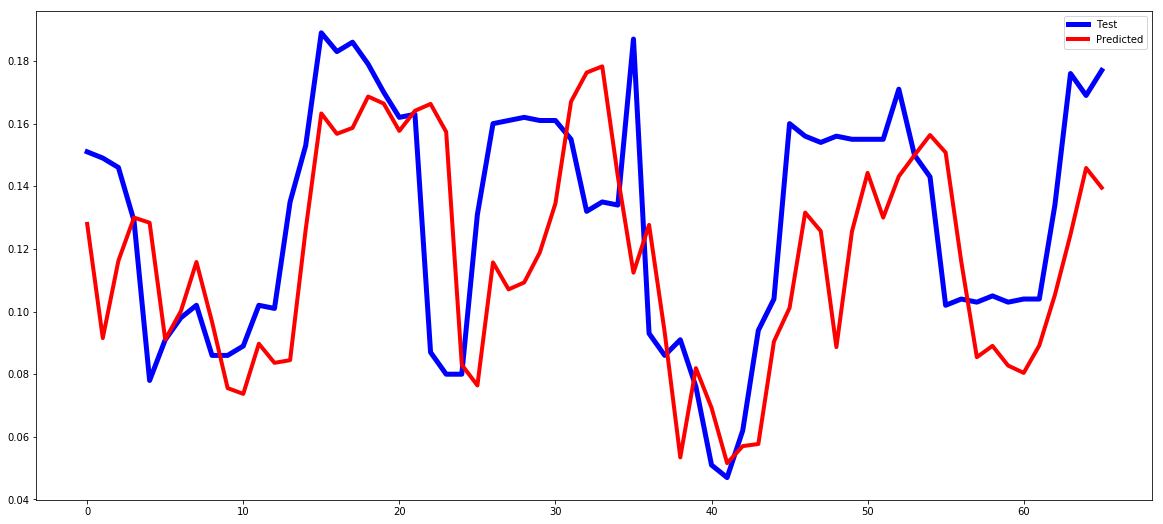

In [38]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds_cnn1,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [39]:
def insert_end(Xin,new_input):
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    return Xin

In [40]:
first =0   # this section for unknown future 
future=170
forcast_cnn = []
Xin = Xtest[first:first+1,:,:]
for i in range(future):
    out = model.predict(Xin, batch_size=1)    
    forcast_cnn.append(out[0,0]) 
    Xin = insert_end(Xin,out[0,0]) 

In [41]:
forcasted_output_cnn=np.asanyarray(forcast_cnn)   
forcasted_output_cnn=forcasted_output_cnn.reshape(-1,1) 
forcasted_output_cnn = scaler.inverse_transform(forcasted_output_cnn) 

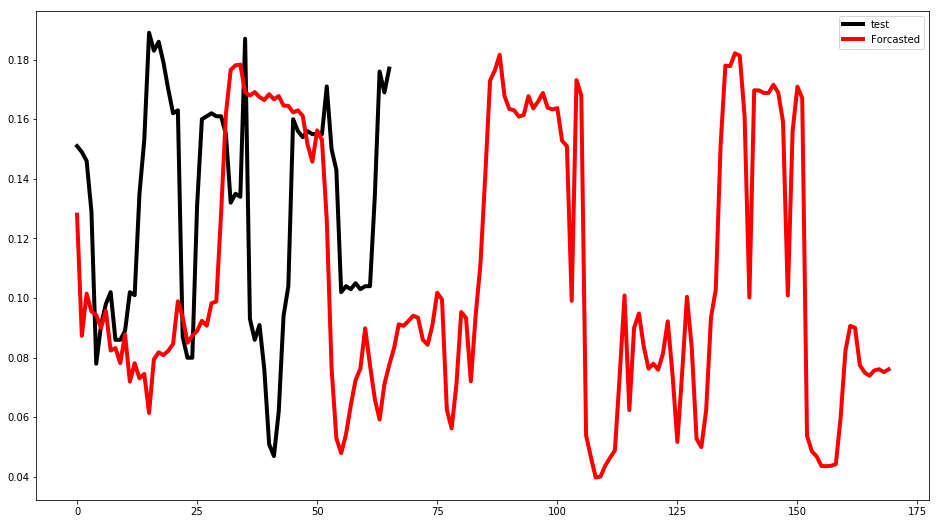

In [42]:
plt.figure(figsize=(16,9))
plt.plot(Ytest , 'black', linewidth=4)
plt.plot(forcasted_output_cnn,'r' , linewidth=4)
plt.legend(('test','Forcasted'))
plt.show()

In [45]:
os.makedirs('./model', exist_ok=True)
model.save('./model/keras_model.h5')

In [46]:
from keras.models import load_model
model2 = load_model('./model/keras_model.h5')
print(model2.outputs)
# [<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]
print(model2.inputs)
# [<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>]

[<tf.Tensor 'dense_2_1/BiasAdd:0' shape=(?, 1) dtype=float32>]
[<tf.Tensor 'conv1d_1_input_1:0' shape=(?, 30, 1) dtype=float32>]


In [47]:
from keras import backend as K
import tensorflow as tf

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph


frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 114 variables.
INFO:tensorflow:Converted 114 variables to const ops.


In [48]:
# Save to ./model/tf_model.pb
tf.train.write_graph(frozen_graph, "model", "tf_model.pb", as_text=False)

'model\\tf_model.pb'

In [51]:
import tensorflow as tf

# Convert the model.


converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file('./model/keras_model.h5')


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Froze 13 variables.
INFO:tensorflow:Converted 13 variables to const ops.
